In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y_true = m_true*x+b_true
y += yerr * np.random.randn(N)

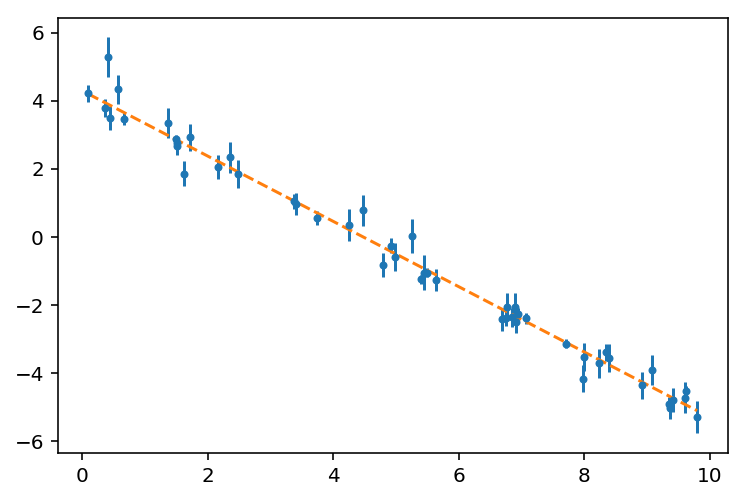

In [2]:
plt.errorbar(x, y, yerr, fmt='.')
plt.plot(x, y_true, '--')

In [3]:
def lnlike(theta):
    m, b = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2)
    chisq = (np.sum((y-model)**2*inv_sigma2))
    lnlikelihood = -0.5*chisq
    return lnlikelihood

In [4]:
def neg_ln_like(theta): 
    return -1 * lnlike(theta)

In [5]:
lnlike([0.5, 1])

-14453.123023656

In [6]:
neg_ln_like([0.5, 1])

14453.123023656

In [7]:
import scipy.optimize as op
result = op.minimize(neg_ln_like, [-1, 5])
m_ml, b_ml = result["x"]

In [8]:
print(result["x"])

[-0.94733864  4.19337829]


In [9]:
y_ml = x * m_ml + b_ml

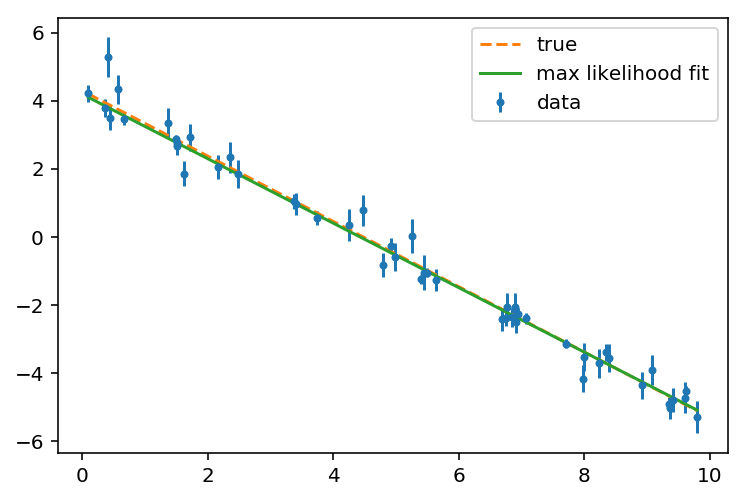

In [10]:
plt.errorbar(x, y, yerr, fmt='.', label='data')
plt.plot(x, y_true, '--', label='true')
plt.plot(x, y_ml, label='max likelihood fit')
plt.legend()

In [11]:
def lnprior(theta):
    m, b = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0:
        return 0.0
    return -np.inf

In [12]:
lnprior([2, 11])

-inf

In [13]:
def lnprob(theta):
    lp = lnprior(theta)
    return lp + lnlike(theta)

In [14]:
lnprob([-14, 20])

-inf

In [36]:
ndim, nwalkers = 2, 100
pos = [[-2, 6] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]


In [16]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, threads=4)

In [17]:
%%time
mcmc_result = sampler.run_mcmc(pos, 2000)

CPU times: user 8.72 s, sys: 982 ms, total: 9.7 s
Wall time: 18.9 s


In [34]:
samples.shape

(100, 2000, 2)

/Users/sheilasagear/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


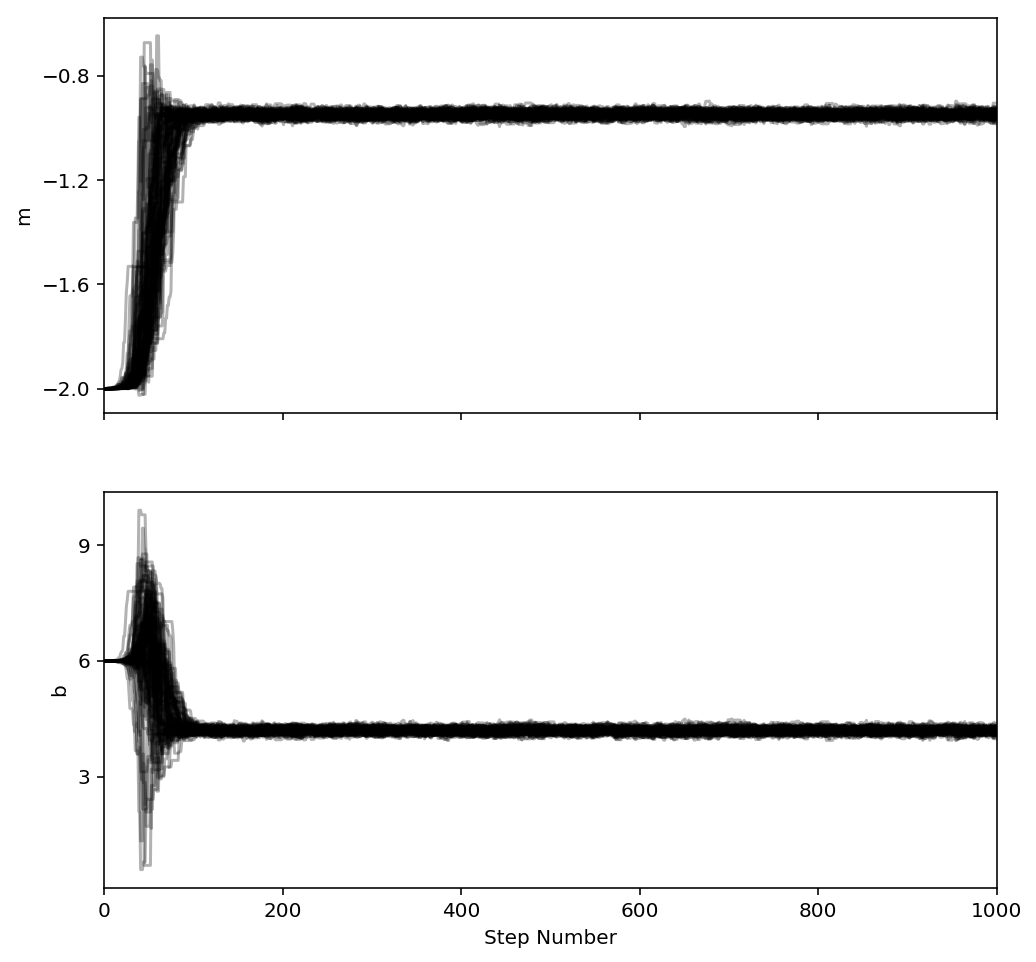

In [19]:
from matplotlib.ticker import MaxNLocator

samples = sampler.chain
labels = ['m', 'b']

fig1 = plt.figure(figsize=[8, 8])
for i in range(samples.shape[-1]):
    ax = fig1.add_subplot(2, 1, i + 1)
    ax.plot(sampler.chain[:, 0:1000, i].T, "k", alpha=0.3)
    ax.set_xlim(0, sampler.chain.shape[1])
    if i < 1:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("Step Number")
    ax.set_ylabel(labels[i])
    ax.yaxis.set_major_locator(MaxNLocator(4))

    plt.xlim(0, 1000)
fig1.show()


In [20]:
clean_samples = samples[:, 500:, :]
samples.shape

(100, 2000, 2)

In [21]:
np.median(clean_samples, axis=(0, 1))

array([-0.94752012,  4.19449435])

In [32]:
flat_chain = clean_samples.reshape((-1, ndim))
flat_chain.shape

(150000, 2)

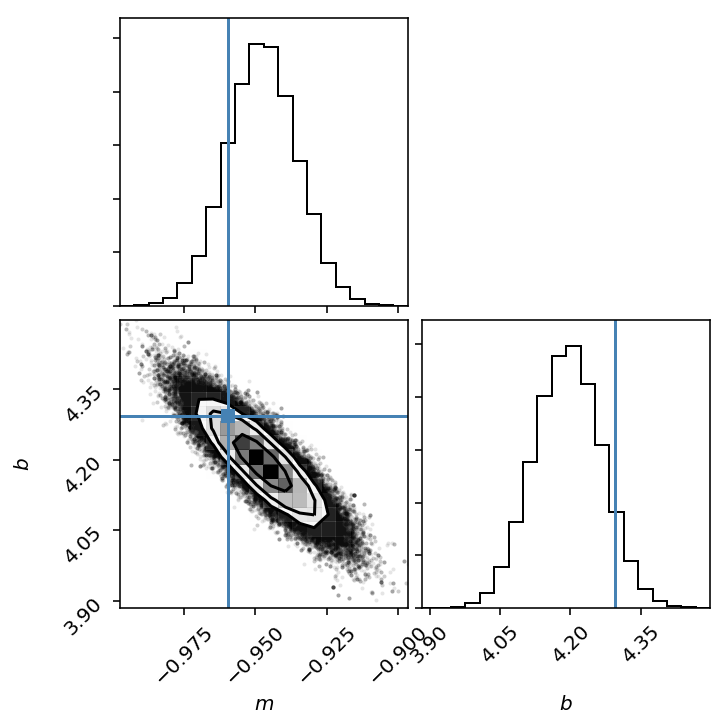

In [33]:
import corner
fig = corner.corner(flat_chain, labels=["$m$", "$b$"],
                          truths=[m_true, b_true])
